In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [66]:
data = pd.read_csv('anonymized.csv')
# date_format = "%a,%d,%b,%Y,%H:%M"
df = data
df.insert(2, 'date', '')
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')

# Drop the original 'day', 'month', and 'year' columns if needed
df = df.drop(columns=['day', 'month', 'year'])
df

,weekday,date,start_time,end_time,duration(in h),pseudonym,sex,machine
0,Mo,2022-12-05,12:00,13:00,1.0,F1,f,2
1,Mo,2022-12-05,13:00,14:00,1.0,F2,f,2
2,Di,2022-12-06,12:00,13:00,1.0,M1,m,1
3,Di,2022-12-06,13:00,14:30,1.5,M2,m,1
4,Di,2022-12-06,14:30,15:30,1.0,M3,m,1
...,...,...,...,...,...,...,...,...
2341,Mo,2023-12-04,10:30,11:30,1.0,M36,m,2
2342,Mo,2023-12-04,11:30,12:30,1.0,M7,m,2
2343,Mo,2023-12-04,15:00,16:00,1.0,M1,m,2
2344,Mo,2023-12-04,17:20,18:20,1.0,M44,m,1


In [110]:
occupancy_per_weekday = df.groupby(['sex', 'weekday']).size()
male_df = occupancy_per_weekday.loc['m'].reset_index(name='occurrences')
female_df = occupancy_per_weekday.loc['f'].reset_index(name='occurrences')
male_df

,weekday,occurrences
0,Di,137
1,Do,144
2,Fr,114
3,Mi,167
4,Mo,142
5,Sa,127
6,So,154


<Axes: >

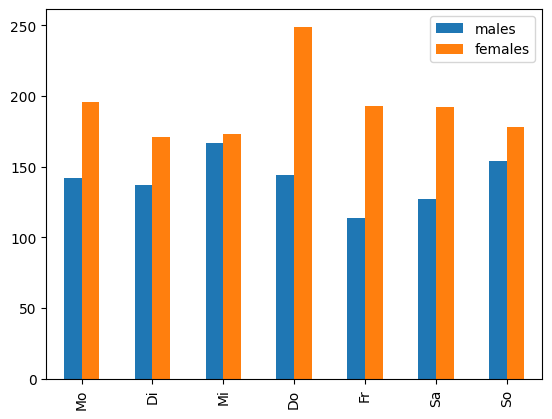

In [133]:
custom_order = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
# Convert 'datetime' column to Categorical with custom order
male_df['weekday'] = pd.Categorical(male_df.weekday, categories=custom_order, ordered=True)
female_df['weekday'] = pd.Categorical(female_df.weekday, categories=custom_order, ordered=True)

# Sort DataFrames by 'datetime'
male_df = male_df.sort_values('weekday')
female_df = female_df.sort_values('weekday')
male_df.set_index('weekday')
female_df.set_index('weekday')

df = pd.DataFrame({'males': list(male_df['occurrences']),
                   'females': list(female_df['occurrences'])}, index=custom_order)
df.plot.bar()

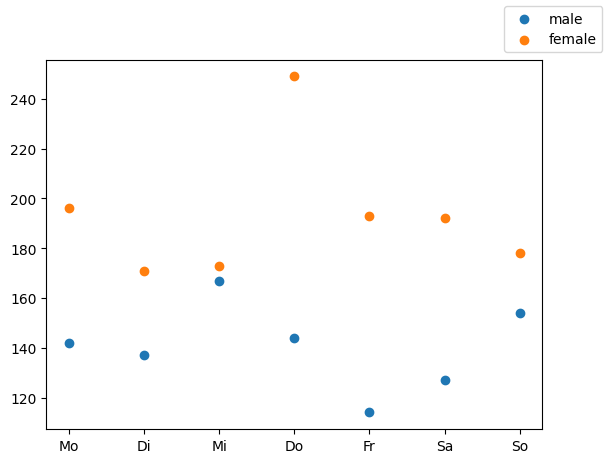

In [124]:
fig, ax = plt.subplots()
ax.scatter(male_df['weekday'], male_df['occurrences'], label='male')
ax.scatter(female_df['weekday'], female_df['occurrences'], label='female')
fig.legend()

In [65]:
# occupancy_per_weekday = df.groupby('weekday')
# occupancy_per_weekday_m = df.groupby('weekday', 'sex')



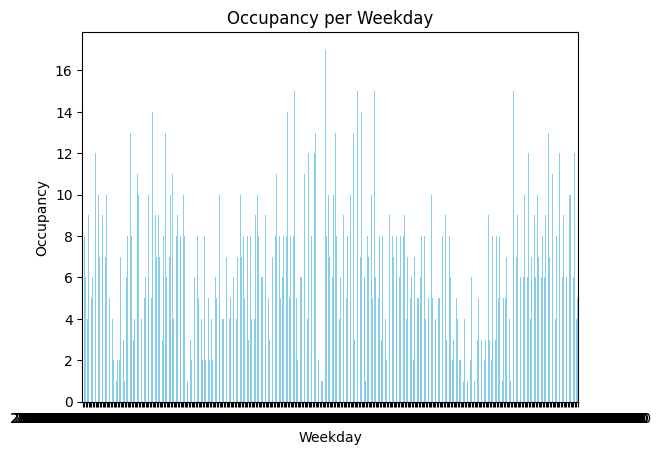

,weekday,date,start_time,end_time,duration(in h),pseudonym,sex,machine,datetime
0,Mo,2022-12-05,12:00,13:00,1.0,F1,f,2,2022-12-05
1,Mo,2022-12-05,13:00,14:00,1.0,F2,f,2,2022-12-05
2,Di,2022-12-06,12:00,13:00,1.0,M1,m,1,2022-12-07
3,Di,2022-12-06,13:00,14:30,1.5,M2,m,1,2022-12-07
4,Di,2022-12-06,14:30,15:30,1.0,M3,m,1,2022-12-07
...,...,...,...,...,...,...,...,...,...
2341,Mo,2023-12-04,10:30,11:30,1.0,M36,m,2,2023-12-04
2342,Mo,2023-12-04,11:30,12:30,1.0,M7,m,2,2023-12-04
2343,Mo,2023-12-04,15:00,16:00,1.0,M1,m,2,2023-12-04
2344,Mo,2023-12-04,17:20,18:20,1.0,M44,m,1,2023-12-04


In [48]:
df['datetime'] = df['date'] + pd.to_timedelta(df['weekday'].map({'Mo': 0, 'Di': 1, 'Mi': 2, 'Do': 3, 'Fr': 4, 'Sa': 5, 'So': 6}), unit='D')

# Group by the combined datetime and count occurrences
occupancy_per_weekday = df.groupby('datetime').size()

# Plot a histogram
occupancy_per_weekday.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Occupancy')
plt.title('Occupancy per Weekday')
plt.show()
df

,weekday,start_time,end_time,duration(in h),pseudonym,sex,machine
0,Mo,12:00,13:00,1.0,F1,f,2
1,Mo,13:00,14:00,1.0,F2,f,2
2,Di,12:00,13:00,1.0,M1,m,1
3,Di,13:00,14:30,1.5,M2,m,1
4,Di,14:30,15:30,1.0,M3,m,1
...,...,...,...,...,...,...,...
2341,Mo,10:30,11:30,1.0,M36,m,2
2342,Mo,11:30,12:30,1.0,M7,m,2
2343,Mo,15:00,16:00,1.0,M1,m,2
2344,Mo,17:20,18:20,1.0,M44,m,1
